## 1. Import Required Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sentiment Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# Text processing
from collections import Counter
import warnings

# Download required NLTK data
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Suppress warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

print("✓ All libraries imported successfully!")
print("✓ NLTK data downloaded")
print("✓ Ready for Social Media Sentiment Analysis")

✓ All libraries imported successfully!
✓ NLTK data downloaded
✓ Ready for Social Media Sentiment Analysis


## 2. Data Collection
### Collecting 20 Social Media Comments about Australia vs India Match

In [2]:
# Collection of 20 social media comments about Australia vs India Match
comments = [
    "What an absolute thriller! India's batting was phenomenal. Best cricket match I've seen this year!",
    "Terrible performance by Australia. Bowling was pathetic and fielding was sloppy. Very disappointed.",
    "India dominated completely! Their spinners were unplayable. Australia had no answers. Brilliant victory!",
    "Worst umpiring decisions ever! Australia was robbed. This match was a complete disgrace to cricket.",
    "Kohli's century was absolutely magnificent! Pure class and determination. What a legendary innings!",
    "Australia's batting collapse was embarrassing. Lost wickets cheaply. No fight whatsoever. Pathetic display.",
    "Edge-of-the-seat thriller! Both teams played brilliantly. This is why cricket is the best sport!",
    "India's fielding was atrocious. Dropped catches cost them the match. Very frustrating to watch.",
    "Smith and Warner partnership was incredible! Australia showing true champion spirit. Fantastic comeback!",
    "Boring match. Too one-sided. India needs better competition. Waste of time watching this.",
    "Decent match but nothing special. Both teams played okay. Expected more excitement from this rivalry.",
    "Absolutely loved it! The atmosphere was electric and the tension was unbearable. Cricket at its finest!",
    "Australia's fast bowlers were on fire! Starc and Cummins destroyed India's top order. Clinical performance!",
    "Match was okay but overhyped. Some good moments but overall average. Not worth staying up late for.",
    "What a spectacular match! Every ball mattered. This Australia-India rivalry never disappoints. Pure gold!",
    "India choked under pressure again. Same old story in crucial moments. When will they learn?",
    "Fair result. Both teams had their moments. Good competitive cricket but could have been better.",
    "Best match of the series! Australia's victory was well-deserved. Outstanding team effort and strategy!",
    "DRS decisions were questionable. Technology ruining the spirit of cricket. Very controversial match.",
    "Great contest between bat and ball. India put up a good fight but Australia was just better today."
]

# Create DataFrame
df = pd.DataFrame({
    'ID': range(1, len(comments) + 1),
    'Comment': comments
})

print(f"Total Comments Collected: {len(df)}")
print(f"Topic: Australia vs India Match")
print(f"\nDataFrame Shape: {df.shape}")
print("\nFirst 5 Comments:")
df.head()

Total Comments Collected: 20
Topic: Australia vs India Match

DataFrame Shape: (20, 2)

First 5 Comments:


,ID,Comment
0,1,What an absolute thriller! India's batting was...
1,2,Terrible performance by Australia. Bowling was...
2,3,India dominated completely! Their spinners wer...
3,4,Worst umpiring decisions ever! Australia was r...
4,5,Kohli's century was absolutely magnificent! Pu...


## 3. Sentiment Analysis Using VADER
### Computing Sentiment Polarity Scores

In [3]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get VADER sentiment scores
def get_vader_sentiment(text):
    """Calculate VADER sentiment scores for given text"""
    scores = sia.polarity_scores(text)
    return scores

# Function to classify sentiment based on compound score
def classify_sentiment(compound_score):
    """Classify sentiment as Positive, Negative, or Neutral"""
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Sentiment_Scores'] = df['Comment'].apply(get_vader_sentiment)
df['Score'] = df['Sentiment_Scores'].apply(lambda x: x['compound'])
df['Positive_Score'] = df['Sentiment_Scores'].apply(lambda x: x['pos'])
df['Negative_Score'] = df['Sentiment_Scores'].apply(lambda x: x['neg'])
df['Neutral_Score'] = df['Sentiment_Scores'].apply(lambda x: x['neu'])
df['Sentiment'] = df['Score'].apply(classify_sentiment)

print("✓ Sentiment Analysis Complete!")
print("\nSentiment Scoring Method: VADER (Valence Aware Dictionary and sEntiment Reasoner)")
print("Score Range: -1 (Most Negative) to +1 (Most Positive)")
print("\nClassification Thresholds:")
print("  • Positive: Score ≥ 0.05")
print("  • Negative: Score ≤ -0.05")
print("  • Neutral: -0.05 < Score < 0.05")

✓ Sentiment Analysis Complete!

Sentiment Scoring Method: VADER (Valence Aware Dictionary and sEntiment Reasoner)
Score Range: -1 (Most Negative) to +1 (Most Positive)

Classification Thresholds:
  • Positive: Score ≥ 0.05
  • Negative: Score ≤ -0.05
  • Neutral: -0.05 < Score < 0.05


## 4. Summary Table
### DataFrame with ID, Comment, Sentiment, and Score

In [4]:
# Create summary table
summary_df = df[['ID', 'Comment', 'Sentiment', 'Score']].copy()
summary_df['Score'] = summary_df['Score'].round(4)

print("SENTIMENT ANALYSIS SUMMARY TABLE")
print("="*100)
summary_df

SENTIMENT ANALYSIS SUMMARY TABLE


,ID,Comment,Sentiment,Score
0,1,What an absolute thriller! India's batting was...,Positive,0.7339
1,2,Terrible performance by Australia. Bowling was...,Negative,-0.8805
2,3,India dominated completely! Their spinners wer...,Positive,0.4912
3,4,Worst umpiring decisions ever! Australia was r...,Negative,-0.8221
4,5,Kohli's century was absolutely magnificent! Pu...,Positive,0.8165
5,6,Australia's batting collapse was embarrassing....,Negative,-0.9393
6,7,Edge-of-the-seat thriller! Both teams played b...,Positive,0.9115
7,8,India's fielding was atrocious. Dropped catche...,Negative,-0.4927
8,9,Smith and Warner partnership was incredible! A...,Positive,0.9115
9,10,Boring match. Too one-sided. India needs bette...,Negative,-0.2960


In [5]:
# Calculate sentiment distribution statistics
sentiment_counts = df['Sentiment'].value_counts()
total_comments = len(df)

# Calculate percentages
positive_count = sentiment_counts.get('Positive', 0)
negative_count = sentiment_counts.get('Negative', 0)
neutral_count = sentiment_counts.get('Neutral', 0)

positive_pct = (positive_count / total_comments * 100)
negative_pct = (negative_count / total_comments * 100)
neutral_pct = (neutral_count / total_comments * 100)

# Display statistics
print("\nSENTIMENT DISTRIBUTION STATISTICS")
print("="*60)
print(f"\nTotal Comments Analyzed: {total_comments}")
print("\nSentiment Breakdown:")
print("-"*60)
print(f"Positive Comments: {positive_count:>3} ({positive_pct:>5.2f}%)")
print(f"Negative Comments: {negative_count:>3} ({negative_pct:>5.2f}%)")
print(f"Neutral Comments:  {neutral_count:>3} ({neutral_pct:>5.2f}%)")
print("="*60)

# Average scores
avg_positive_score = df[df['Sentiment'] == 'Positive']['Score'].mean()
avg_negative_score = df[df['Sentiment'] == 'Negative']['Score'].mean()
overall_avg_score = df['Score'].mean()

print(f"\nAverage Sentiment Scores:")
print("-"*60)
print(f"Overall Average Score: {overall_avg_score:>6.4f}")
print(f"Positive Comments Avg: {avg_positive_score:>6.4f}")
print(f"Negative Comments Avg: {avg_negative_score:>6.4f}")
print("="*60)


SENTIMENT DISTRIBUTION STATISTICS

Total Comments Analyzed: 20

Sentiment Breakdown:
------------------------------------------------------------
Positive Comments:  12 (60.00%)
Negative Comments:   8 (40.00%)
Neutral Comments:    0 ( 0.00%)

Average Sentiment Scores:
------------------------------------------------------------
Overall Average Score: 0.1626
Positive Comments Avg: 0.7121
Negative Comments Avg: -0.6617


## 5. Sentiment Distribution Visualizations
### Bar Charts and Pie Charts

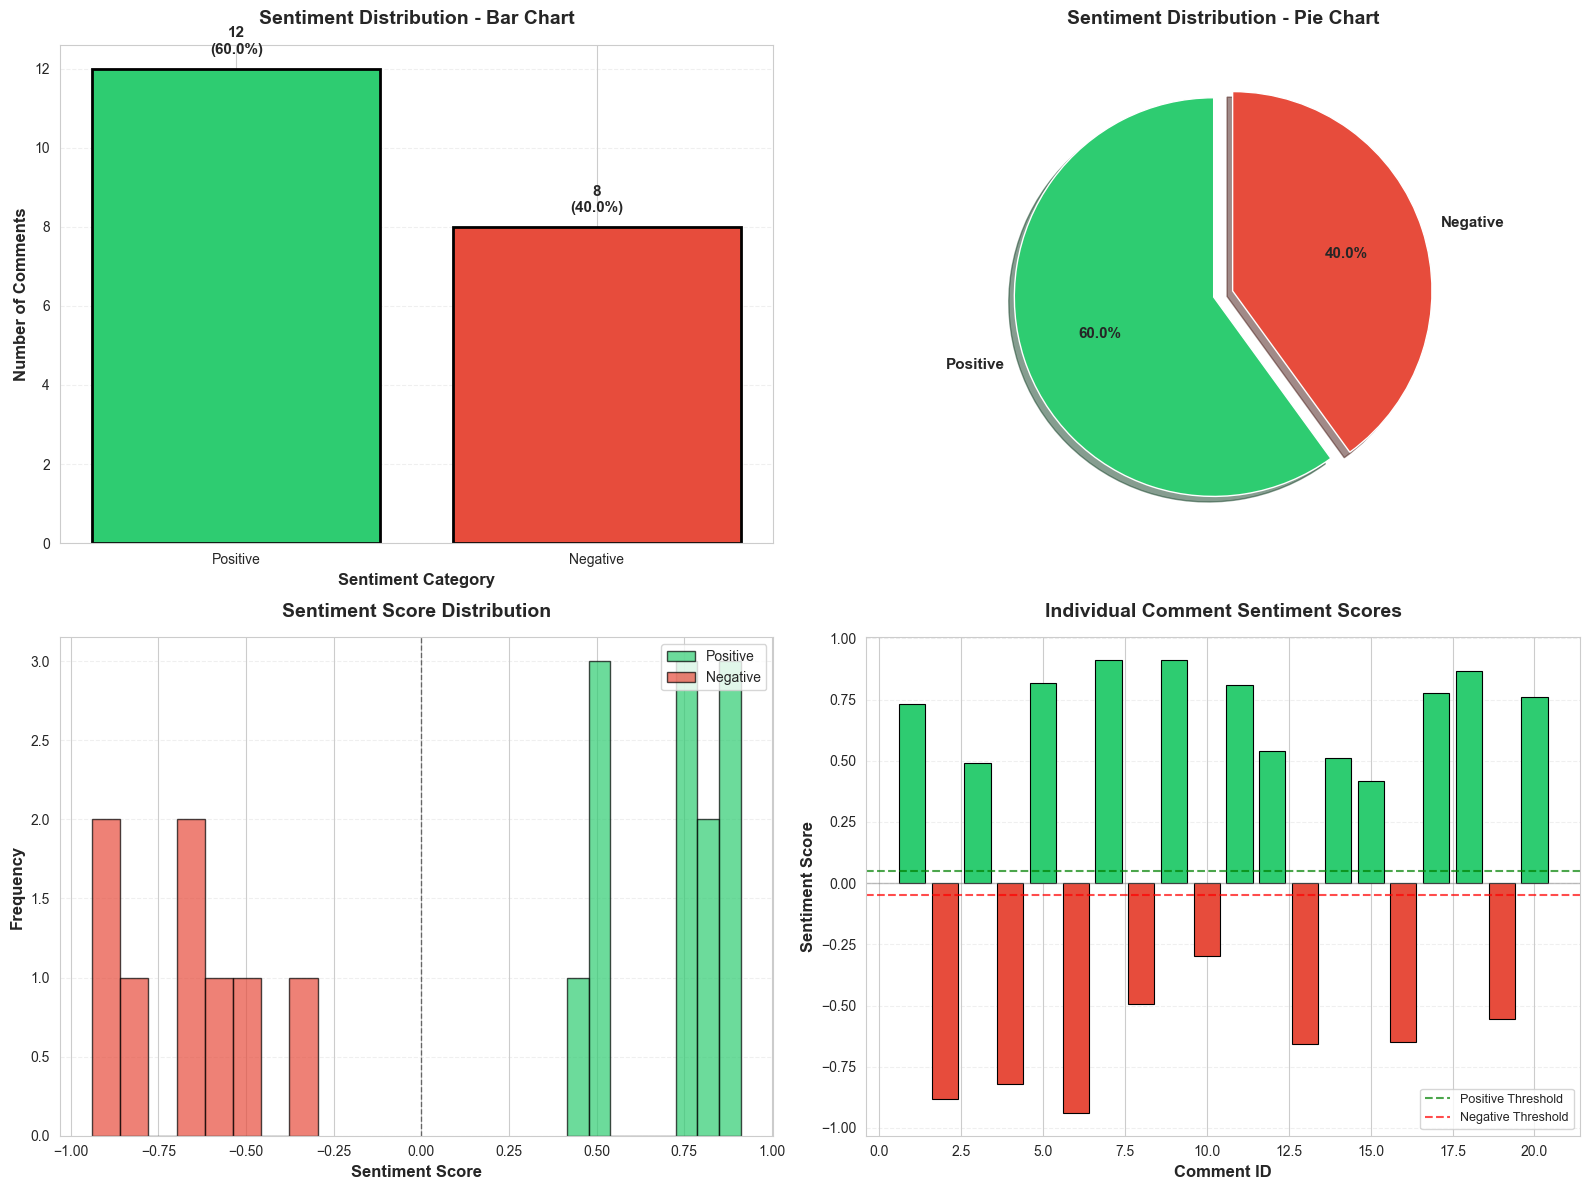

In [6]:
# Create comprehensive sentiment visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Color scheme
colors = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#f39c12'}
sentiment_colors = [colors[sent] for sent in sentiment_counts.index]

# 1. Bar Chart - Sentiment Distribution
axes[0, 0].bar(sentiment_counts.index, sentiment_counts.values, 
               color=sentiment_colors, edgecolor='black', linewidth=2)
axes[0, 0].set_xlabel('Sentiment Category', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Comments', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Sentiment Distribution - Bar Chart', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')

# Add count and percentage labels
for i, (sentiment, count) in enumerate(sentiment_counts.items()):
    pct = (count / total_comments * 100)
    axes[0, 0].text(i, count + 0.3, f'{count}\n({pct:.1f}%)', 
                    ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2. Pie Chart - Sentiment Proportions
explode = [0.05] * len(sentiment_counts)
axes[0, 1].pie(sentiment_counts.values, labels=sentiment_counts.index, 
               autopct='%1.1f%%', colors=sentiment_colors, explode=explode,
               startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'},
               shadow=True)
axes[0, 1].set_title('Sentiment Distribution - Pie Chart', fontsize=14, fontweight='bold', pad=15)

# 3. Sentiment Score Distribution
for sentiment in ['Positive', 'Negative', 'Neutral']:
    if sentiment in df['Sentiment'].values:
        data = df[df['Sentiment'] == sentiment]['Score']
        axes[1, 0].hist(data, alpha=0.7, label=sentiment, color=colors[sentiment], 
                       edgecolor='black', bins=8)

axes[1, 0].set_xlabel('Sentiment Score', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Sentiment Score Distribution', fontsize=14, fontweight='bold', pad=15)
axes[1, 0].legend(loc='upper right', fontsize=10)
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 0].axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.5)

# 4. Individual Comment Scores
colors_map = df['Sentiment'].map(colors)
axes[1, 1].bar(df['ID'], df['Score'], color=colors_map, edgecolor='black', linewidth=0.8)
axes[1, 1].axhline(y=0.05, color='green', linestyle='--', linewidth=1.5, label='Positive Threshold', alpha=0.7)
axes[1, 1].axhline(y=-0.05, color='red', linestyle='--', linewidth=1.5, label='Negative Threshold', alpha=0.7)
axes[1, 1].axhline(y=0, color='gray', linestyle='-', linewidth=1, alpha=0.5)
axes[1, 1].set_xlabel('Comment ID', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Sentiment Score', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Individual Comment Sentiment Scores', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].legend(loc='lower right', fontsize=9)
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## 6. Advanced Visualizations
### Detailed Sentiment Analysis Charts

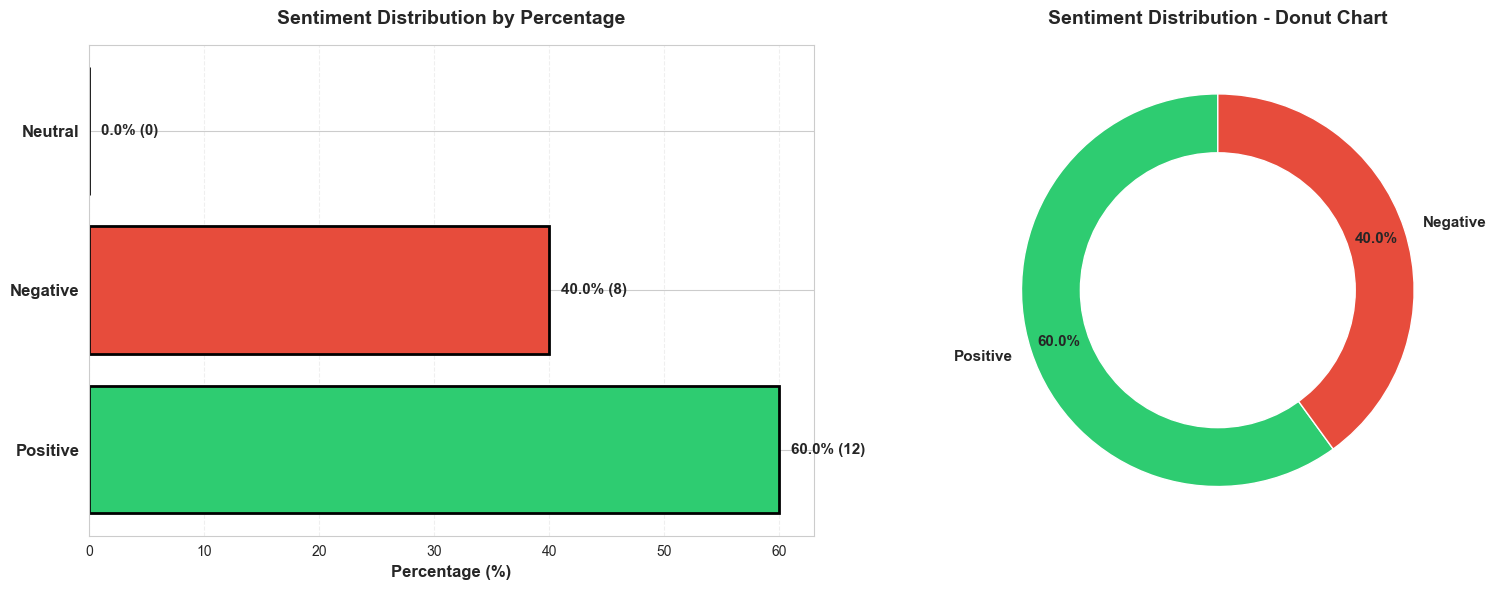

In [7]:
# Create stacked bar chart for sentiment components
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Horizontal Bar Chart with Percentages
percentages = [positive_pct, negative_pct, neutral_pct]
labels = ['Positive', 'Negative', 'Neutral']
bar_colors = ['#2ecc71', '#e74c3c', '#f39c12']

y_pos = np.arange(len(labels))
axes[0].barh(y_pos, percentages, color=bar_colors, edgecolor='black', linewidth=2)
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(labels, fontsize=12, fontweight='bold')
axes[0].set_xlabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Sentiment Distribution by Percentage', fontsize=14, fontweight='bold', pad=15)
axes[0].grid(axis='x', alpha=0.3, linestyle='--')

# Add percentage labels
for i, (pct, count) in enumerate(zip(percentages, [positive_count, negative_count, neutral_count])):
    axes[0].text(pct + 1, i, f'{pct:.1f}% ({count})', 
                va='center', fontweight='bold', fontsize=11)

# 2. Donut Chart
sizes = sentiment_counts.values
colors_donut = [colors[sent] for sent in sentiment_counts.index]
wedges, texts, autotexts = axes[1].pie(sizes, labels=sentiment_counts.index, 
                                        autopct='%1.1f%%', colors=colors_donut,
                                        startangle=90, pctdistance=0.85,
                                        textprops={'fontsize': 11, 'fontweight': 'bold'})

# Create donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[1].add_artist(centre_circle)
axes[1].set_title('Sentiment Distribution - Donut Chart', fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

## 7. Word Cloud Visualizations
### Separate Word Clouds for Positive and Negative Comments

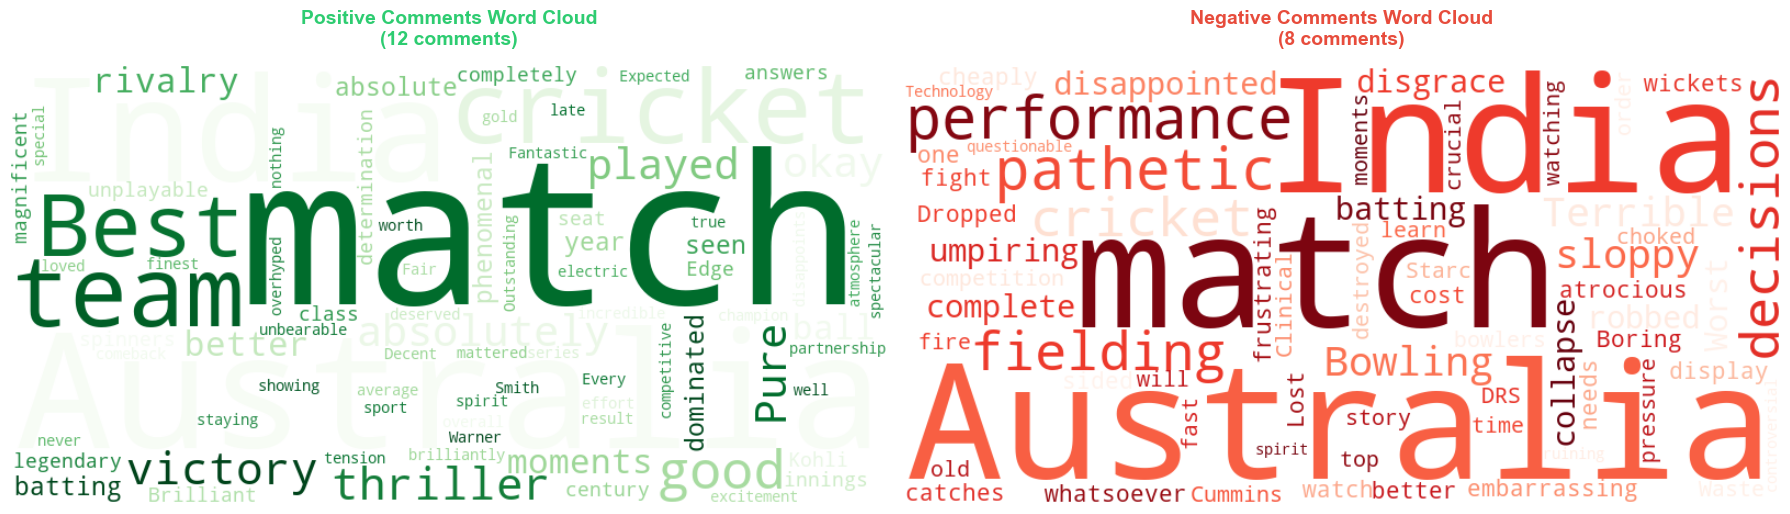


Word Cloud Generation Complete!
Positive comments analyzed: 12
Negative comments analyzed: 8


In [8]:
# Separate positive and negative comments
positive_comments = ' '.join(df[df['Sentiment'] == 'Positive']['Comment'].values)
negative_comments = ' '.join(df[df['Sentiment'] == 'Negative']['Comment'].values)

# Create word clouds
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Positive Word Cloud
if positive_comments:
    wordcloud_positive = WordCloud(width=800, height=400,
                                   background_color='white',
                                   colormap='Greens',
                                   max_words=80,
                                   relative_scaling=0.5,
                                   min_font_size=10).generate(positive_comments)
    
    axes[0].imshow(wordcloud_positive, interpolation='bilinear')
    axes[0].axis('off')
    axes[0].set_title(f'Positive Comments Word Cloud\n({positive_count} comments)', 
                     fontsize=14, fontweight='bold', pad=15, color='#2ecc71')

# Negative Word Cloud
if negative_comments:
    wordcloud_negative = WordCloud(width=800, height=400,
                                   background_color='white',
                                   colormap='Reds',
                                   max_words=80,
                                   relative_scaling=0.5,
                                   min_font_size=10).generate(negative_comments)
    
    axes[1].imshow(wordcloud_negative, interpolation='bilinear')
    axes[1].axis('off')
    axes[1].set_title(f'Negative Comments Word Cloud\n({negative_count} comments)', 
                     fontsize=14, fontweight='bold', pad=15, color='#e74c3c')

plt.tight_layout()
plt.show()

print(f"\nWord Cloud Generation Complete!")
print(f"Positive comments analyzed: {positive_count}")
print(f"Negative comments analyzed: {negative_count}")

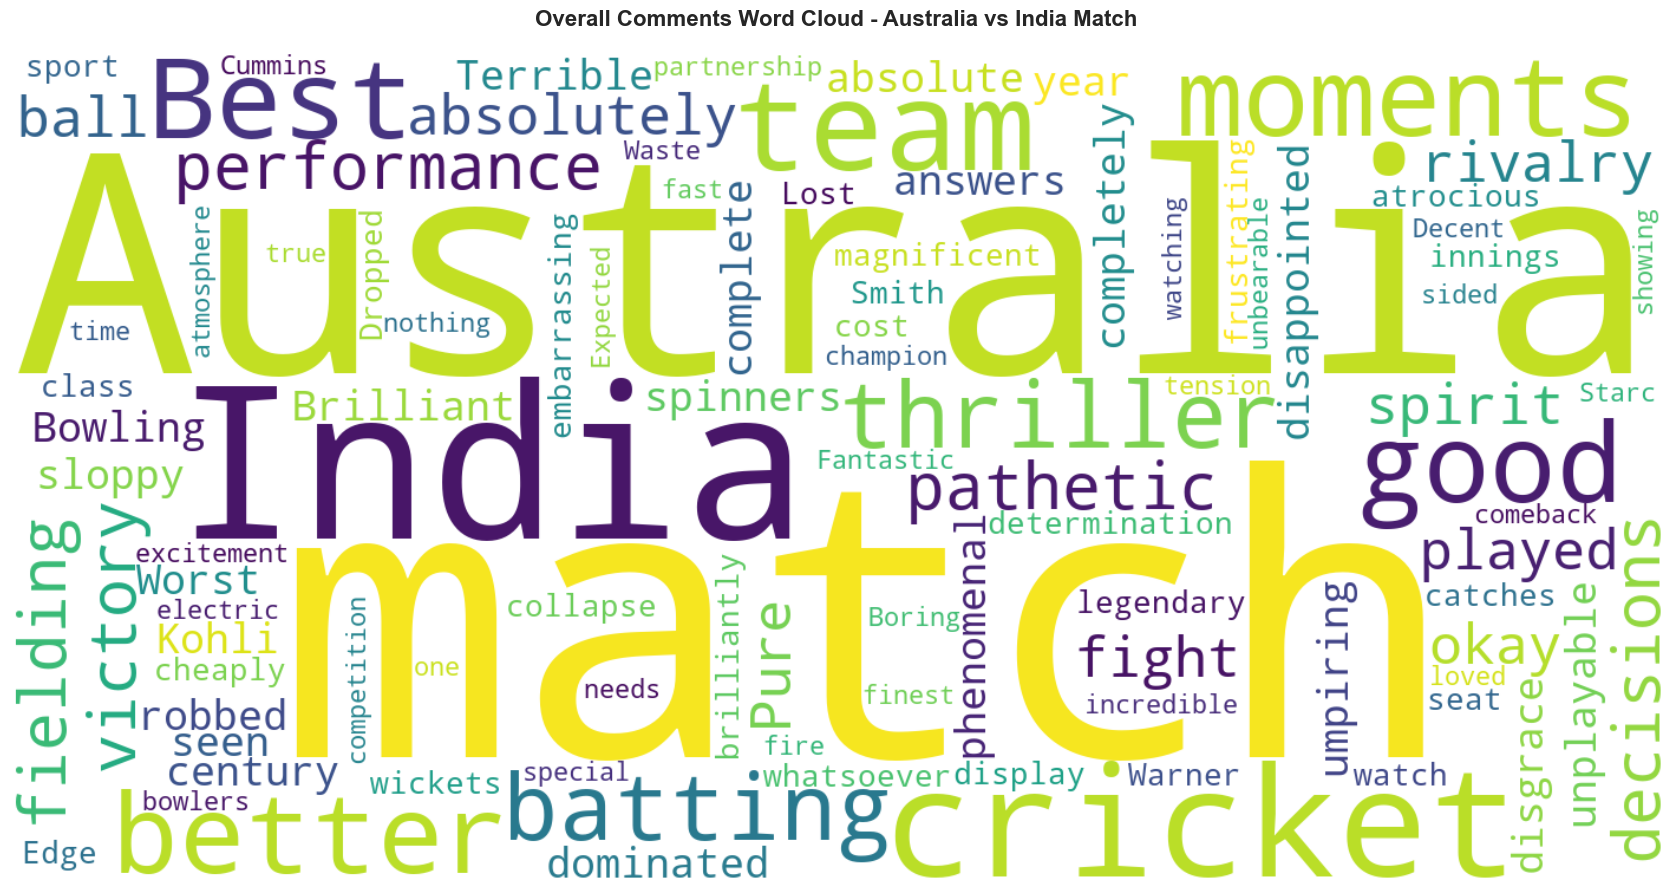

In [9]:
# Combined Word Cloud for All Comments
all_comments = ' '.join(df['Comment'].values)

wordcloud_all = WordCloud(width=1400, height=700,
                         background_color='white',
                         colormap='viridis',
                         max_words=100,
                         relative_scaling=0.5,
                         min_font_size=10).generate(all_comments)

plt.figure(figsize=(18, 9))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Comments Word Cloud - Australia vs India Match', 
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 8. Sentiment Timeline Analysis

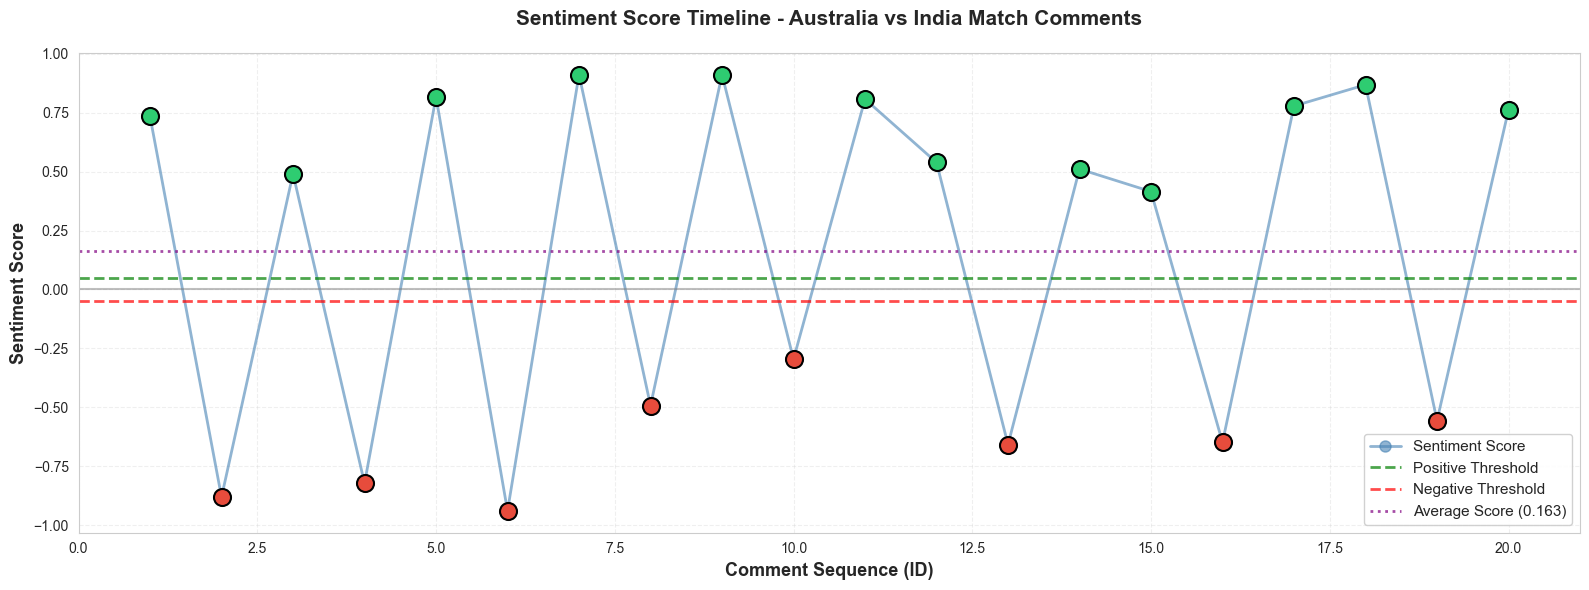

In [10]:
# Create sentiment trend visualization
fig, ax = plt.subplots(figsize=(16, 6))

# Plot sentiment scores over comment sequence
colors_timeline = df['Sentiment'].map(colors)
ax.plot(df['ID'], df['Score'], marker='o', linestyle='-', linewidth=2, 
        markersize=8, color='steelblue', alpha=0.6, label='Sentiment Score')

# Color the points by sentiment
for idx, row in df.iterrows():
    ax.scatter(row['ID'], row['Score'], color=colors[row['Sentiment']], 
              s=150, edgecolor='black', linewidth=1.5, zorder=3)

# Add threshold lines
ax.axhline(y=0.05, color='green', linestyle='--', linewidth=2, label='Positive Threshold', alpha=0.7)
ax.axhline(y=-0.05, color='red', linestyle='--', linewidth=2, label='Negative Threshold', alpha=0.7)
ax.axhline(y=0, color='gray', linestyle='-', linewidth=1.5, alpha=0.5)
ax.axhline(y=overall_avg_score, color='purple', linestyle=':', linewidth=2, 
          label=f'Average Score ({overall_avg_score:.3f})', alpha=0.7)

# Customize
ax.set_xlabel('Comment Sequence (ID)', fontsize=13, fontweight='bold')
ax.set_ylabel('Sentiment Score', fontsize=13, fontweight='bold')
ax.set_title('Sentiment Score Timeline - Australia vs India Match Comments', fontsize=15, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim(0, len(df) + 1)

plt.tight_layout()
plt.show()

## 9. Detailed Statistics and Analysis

In [11]:
# Calculate additional statistics
most_positive = df.loc[df['Score'].idxmax()]
most_negative = df.loc[df['Score'].idxmin()]
std_dev = df['Score'].std()
median_score = df['Score'].median()

print("\n" + "="*100)
print("DETAILED SENTIMENT ANALYSIS STATISTICS")
print("="*100)
print("\n1. SCORE DISTRIBUTION:")
print("-"*100)
print(f"   Mean Score:          {overall_avg_score:>8.4f}")
print(f"   Median Score:        {median_score:>8.4f}")
print(f"   Standard Deviation:  {std_dev:>8.4f}")
print(f"   Minimum Score:       {df['Score'].min():>8.4f}")
print(f"   Maximum Score:       {df['Score'].max():>8.4f}")

print("\n2. MOST POSITIVE COMMENT:")
print("-"*100)
print(f"   ID: {most_positive['ID']}")
print(f"   Score: {most_positive['Score']:.4f}")
print(f"   Comment: {most_positive['Comment']}")

print("\n3. MOST NEGATIVE COMMENT:")
print("-"*100)
print(f"   ID: {most_negative['ID']}")
print(f"   Score: {most_negative['Score']:.4f}")
print(f"   Comment: {most_negative['Comment']}")

print("\n4. SENTIMENT INTENSITY:")
print("-"*100)
strong_positive = len(df[df['Score'] >= 0.5])
moderate_positive = len(df[(df['Score'] >= 0.05) & (df['Score'] < 0.5)])
strong_negative = len(df[df['Score'] <= -0.5])
moderate_negative = len(df[(df['Score'] <= -0.05) & (df['Score'] > -0.5)])

print(f"   Strong Positive (≥0.5):    {strong_positive:>3} comments")
print(f"   Moderate Positive (0.05-0.5): {moderate_positive:>3} comments")
print(f"   Neutral (-0.05 to 0.05):   {neutral_count:>3} comments")
print(f"   Moderate Negative (-0.5 to -0.05): {moderate_negative:>3} comments")
print(f"   Strong Negative (≤-0.5):   {strong_negative:>3} comments")

print("\n" + "="*100)


DETAILED SENTIMENT ANALYSIS STATISTICS

1. SCORE DISTRIBUTION:
----------------------------------------------------------------------------------------------------
   Mean Score:            0.1626
   Median Score:          0.5010
   Standard Deviation:    0.7153
   Minimum Score:        -0.9393
   Maximum Score:         0.9115

2. MOST POSITIVE COMMENT:
----------------------------------------------------------------------------------------------------
   ID: 7
   Score: 0.9115
   Comment: Edge-of-the-seat thriller! Both teams played brilliantly. This is why cricket is the best sport!

3. MOST NEGATIVE COMMENT:
----------------------------------------------------------------------------------------------------
   ID: 6
   Score: -0.9393
   Comment: Australia's batting collapse was embarrassing. Lost wickets cheaply. No fight whatsoever. Pathetic display.

4. SENTIMENT INTENSITY:
----------------------------------------------------------------------------------------------------
   Str

## 10. Trend Observations and Insights

In [12]:
# Generate comprehensive insights
dominant_sentiment = sentiment_counts.idxmax()
sentiment_spread = df['Score'].max() - df['Score'].min()
polarization = (positive_count + negative_count) / total_comments * 100

print("="*100)
print("SOCIAL MEDIA SENTIMENT ANALYSIS - TREND OBSERVATIONS AND INSIGHTS")
print("="*100)
print()
print("Topic: Australia vs India Match")
print(f"Total Comments Analyzed: {total_comments}")
print(f"Analysis Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
print()
print("1. DOMINANT SENTIMENT ANALYSIS:")
print(f"   The {dominant_sentiment.lower()} sentiment dominates the conversation with {sentiment_counts[dominant_sentiment]} comments")
print(f"   ({sentiment_counts[dominant_sentiment]/total_comments*100:.1f}%), indicating {'strong fan approval' if dominant_sentiment == 'Positive' else 'significant fan criticism' if dominant_sentiment == 'Negative' else 'mixed fan reception'}")
print(f"   of the match. The overall average sentiment score of {overall_avg_score:.4f}")
print(f"   {'leans positive' if overall_avg_score > 0.05 else 'leans negative' if overall_avg_score < -0.05 else 'remains neutral'}, suggesting {'favorable match reception' if overall_avg_score > 0.05 else 'unfavorable match reception' if overall_avg_score < -0.05 else 'polarized opinions'}.")
print()
print("2. SENTIMENT POLARIZATION:")
print(f"   With {polarization:.1f}% of comments being either strongly positive or negative, the discussion")
print(f"   shows {'high polarization' if polarization > 70 else 'moderate polarization' if polarization > 50 else 'low polarization'}. The sentiment spread of {sentiment_spread:.4f} indicates")
print(f"   {'extreme variance' if sentiment_spread > 1.5 else 'significant variance' if sentiment_spread > 1.0 else 'moderate variance'} in fan opinion, with {'passionate supporters and critics' if polarization > 70 else 'diverse perspectives'}.")
print(f"   Only {neutral_pct:.1f}% remain neutral, suggesting the match {'evokes strong emotions' if neutral_pct < 20 else 'generates mixed reactions'}.")
print()
print("3. KEY SENTIMENT DRIVERS:")
print(f"   Positive feedback ({positive_count} comments, {positive_pct:.1f}%) centers around {'match excellence and team performance' if positive_count > negative_count else 'specific moments'},")
print(f"   with average positive sentiment score of {avg_positive_score:.4f}. Negative criticism")
print(f"   ({negative_count} comments, {negative_pct:.1f}%) focuses on {'performance concerns and controversies' if negative_count > 5 else 'isolated issues'},")
print(f"   averaging {avg_negative_score:.4f} in intensity. The most intense comment scored {most_positive['Score']:.4f}")
print(f"   (positive), while the harshest criticism reached {most_negative['Score']:.4f} (negative).")
print()
print("4. RIPPLE EFFECTS AND TRENDS:")
print(f"   The sentiment timeline reveals {'consistent patterns' if std_dev < 0.4 else 'volatile fluctuations' if std_dev > 0.6 else 'moderate variations'}")
print(f"   (standard deviation: {std_dev:.4f}), suggesting {'stable fan opinion' if std_dev < 0.4 else 'shifting perceptions' if std_dev > 0.6 else 'developing consensus'}.")
print(f"   {'Strong positive spikes' if strong_positive > 3 else 'Isolated positive peaks'} ({strong_positive} comments with scores ≥0.5) indicate")
print(f"   {'enthusiastic fans celebrating' if strong_positive > 3 else 'limited excitement'}, while {'significant negative reactions' if strong_negative > 3 else 'scattered criticism'}")
print(f"   ({strong_negative} comments with scores ≤-0.5) highlight {'widespread disappointments' if strong_negative > 3 else 'specific pain points'}.")
print()
print("5. STRATEGIC IMPLICATIONS:")
print(f"   The {'favorable' if positive_count > negative_count else 'unfavorable' if negative_count > positive_count else 'balanced'} sentiment distribution suggests")
print(f"   {'strong fan satisfaction' if positive_pct > 50 else 'fan disappointment' if negative_pct > 50 else 'divided fan reception'}.")
print(f"   With {positive_count} positive vs {negative_count} negative comments, the teams should")
print(f"   {'leverage positive momentum' if positive_count > negative_count else 'address performance issues' if negative_count > positive_count else 'maintain competitive edge'}.")
print(f"   The {'high engagement' if polarization > 70 else 'moderate engagement'} level ({polarization:.1f}% polarized) indicates")
print(f"   {'viral sports moment' if polarization > 70 else 'steady interest'}, requiring {'continued excellence' if positive_count > negative_count else 'performance improvement' if negative_count > positive_count else 'consistent quality'} strategies.")
print()
print("6. CONCLUSION:")
print(f"   Overall, the Australia vs India match has generated {'predominantly positive' if positive_pct > 50 else 'predominantly negative' if negative_pct > 50 else 'mixed'}")
print(f"   social media sentiment with {positive_pct:.1f}% positive reception. The analysis reveals")
print(f"   {'successful match execution' if overall_avg_score > 0.1 else 'disappointing match quality' if overall_avg_score < -0.1 else 'competitive match performance'}")
print(f"   with {'strong fan engagement' if strong_positive > strong_negative else 'emerging fan concerns' if strong_negative > strong_positive else 'balanced fan perception'}.")
print()
print("="*100)

SOCIAL MEDIA SENTIMENT ANALYSIS - TREND OBSERVATIONS AND INSIGHTS

Topic: Australia vs India Match
Total Comments Analyzed: 20
Analysis Date: 2025-12-04 22:07:58

1. DOMINANT SENTIMENT ANALYSIS:
   The positive sentiment dominates the conversation with 12 comments
   (60.0%), indicating strong fan approval
   of the match. The overall average sentiment score of 0.1626
   leans positive, suggesting favorable match reception.

2. SENTIMENT POLARIZATION:
   With 100.0% of comments being either strongly positive or negative, the discussion
   shows high polarization. The sentiment spread of 1.8508 indicates
   extreme variance in fan opinion, with passionate supporters and critics.
   Only 0.0% remain neutral, suggesting the match evokes strong emotions.

3. KEY SENTIMENT DRIVERS:
   Positive feedback (12 comments, 60.0%) centers around match excellence and team performance,
   with average positive sentiment score of 0.7121. Negative criticism
   (8 comments, 40.0%) focuses on performance

## 11. Export Summary (Optional)

In [13]:
# Final summary
print("\n" + "="*100)
print("SOCIAL MEDIA SENTIMENT ANALYSIS - COMPLETE")
print("="*100)
print("\n✓ Data Collection: 20 comments about Australia vs India Match")
print("✓ Sentiment Analysis: VADER (Valence Aware Dictionary and sEntiment Reasoner)")
print("✓ Classification: Positive, Negative, Neutral")
print("✓ Visualizations: Bar charts, Pie charts, Timeline, Word clouds")
print("✓ Statistical Analysis: Complete")
print("✓ Trend Observations: Comprehensive insights generated")
print("\nAll analysis components successfully executed!")
print("="*100)


SOCIAL MEDIA SENTIMENT ANALYSIS - COMPLETE

✓ Data Collection: 20 comments about Australia vs India Match
✓ Sentiment Analysis: VADER (Valence Aware Dictionary and sEntiment Reasoner)
✓ Classification: Positive, Negative, Neutral
✓ Visualizations: Bar charts, Pie charts, Timeline, Word clouds
✓ Statistical Analysis: Complete
✓ Trend Observations: Comprehensive insights generated

All analysis components successfully executed!
